<a href="https://colab.research.google.com/github/Karim-Farhat/Stack-Overflow-Programming-Languages-Trend-Analysis/blob/main/Programming_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [7]:
df.head()


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [8]:
df.shape

(2901, 3)

In [9]:
df.count()

,0
DATE,2901
TAG,2901
POSTS,2901


In [10]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,45185
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,408226
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1623391
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,814807
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52545
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,74460
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1917321
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2525791
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68314


In [12]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,209,209
c,209,209
c#,210,210
c++,209,209
delphi,209,209
go,194,194
java,209,209
javascript,209,209
perl,209,209


In [14]:
df.DATE[1]

'2008-08-01 00:00:00'

In [15]:
df.DATE = pd.to_datetime(df.DATE)

In [16]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


In [17]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [18]:
reshaped_df.shape

(210, 14)

In [19]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1637.0,751.0,104.0,NaN,1121.0,629.0,128.0,472.0,533.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1982.0,804.0,112.0,NaN,1142.0,720.0,128.0,603.0,504.0,NaN,245.0,NaN
2008-11-01,16.0,257.0,1728.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [20]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [21]:
reshaped_df.count()

,0
TAG,
assembly,209
c,209
c#,210
c++,209
delphi,209
go,194
java,209
javascript,209
perl,209


In [53]:
reshaped_df.fillna(0, inplace=True)

In [27]:
reshaped_df.isna().sum()

,0
TAG,
assembly,0
c,0
c#,0
c++,0
delphi,0
go,0
java,0
javascript,0
perl,0


<Axes: xlabel='DATE'>

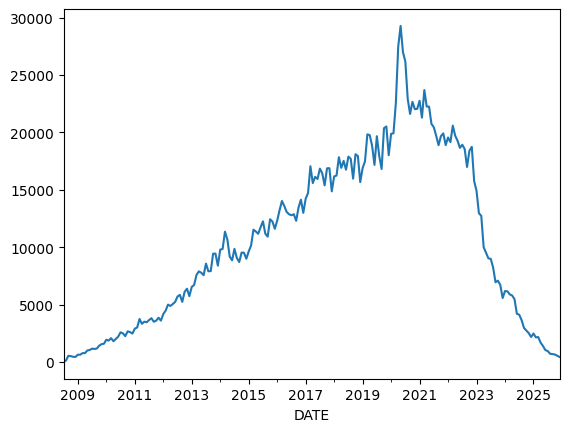

In [31]:
reshaped_df['python'].plot()

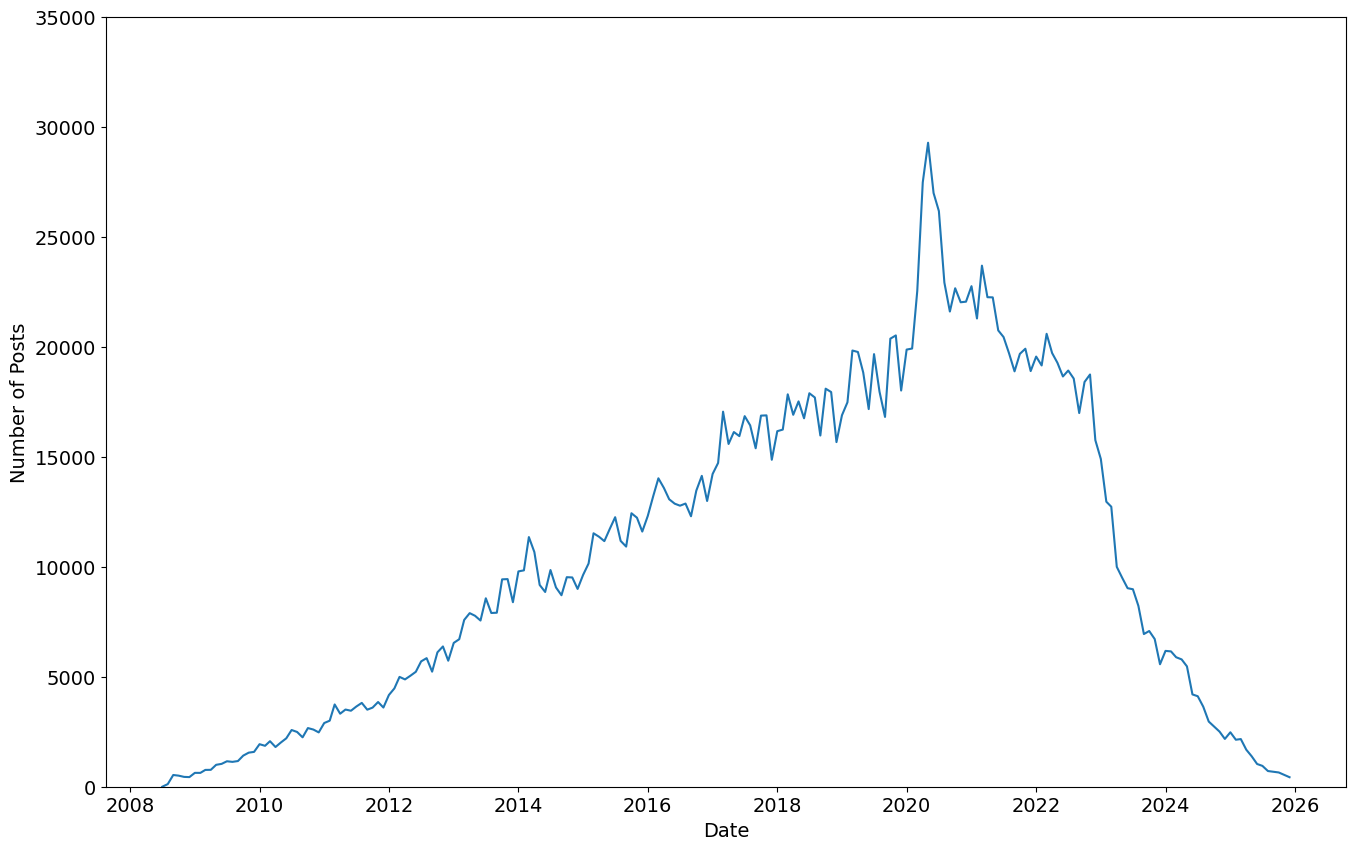

In [32]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.python)


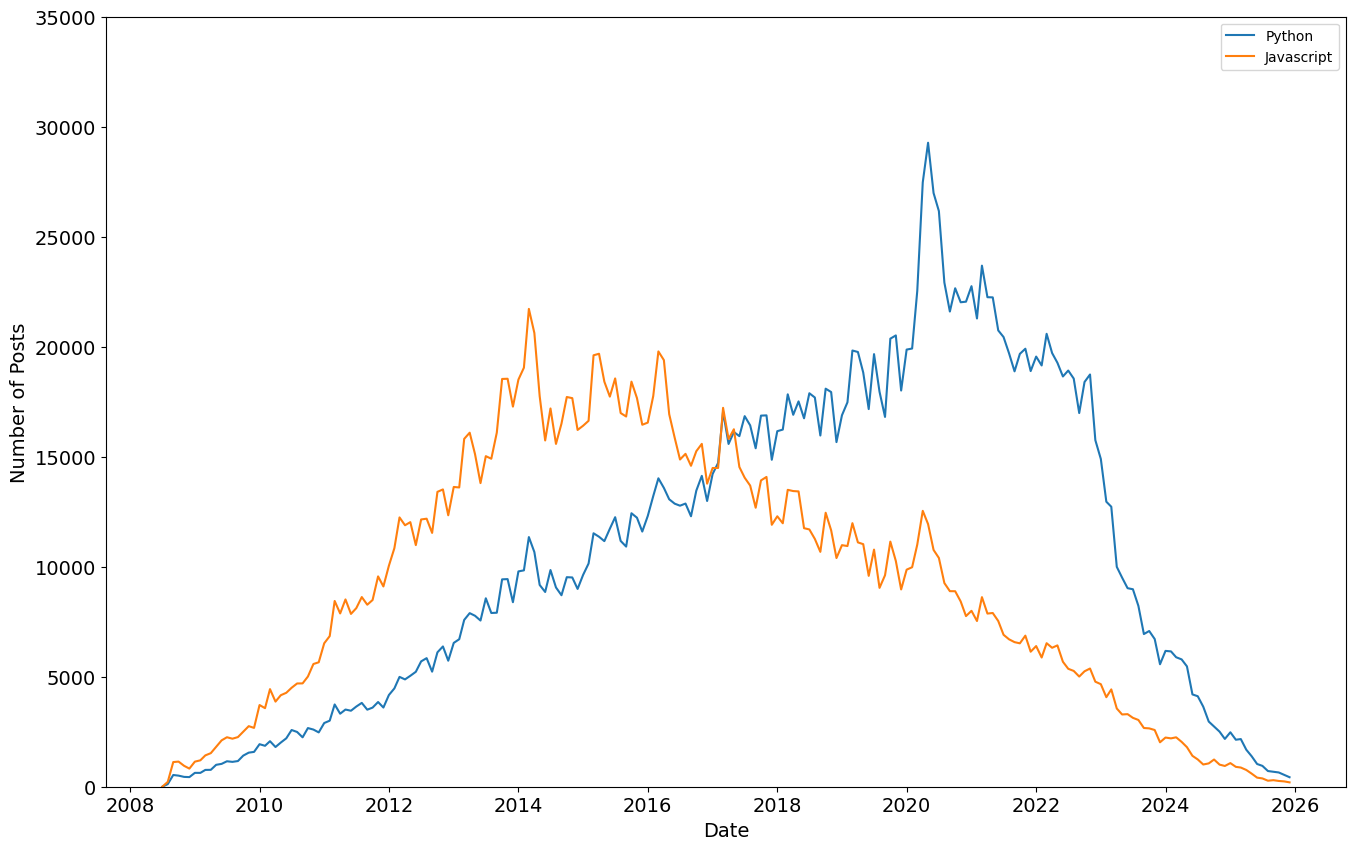

In [39]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.python, label='Python')
plt.plot(reshaped_df.index, reshaped_df.java, label='Javascript')
plt.legend()

<Figure size 1600x1000 with 0 Axes>

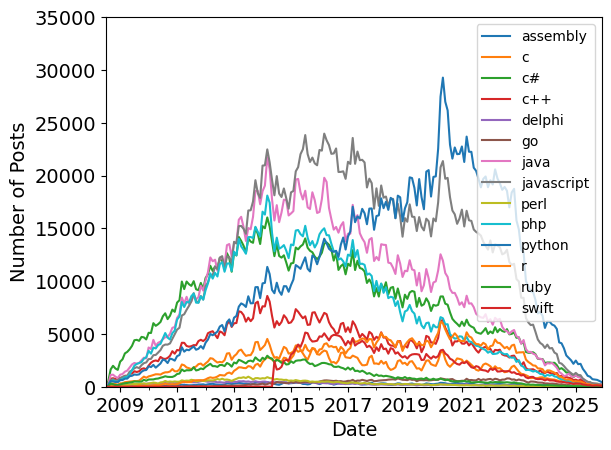

In [45]:
plt.figure(figsize=(16,10))
reshaped_df.plot()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.legend(loc='best')

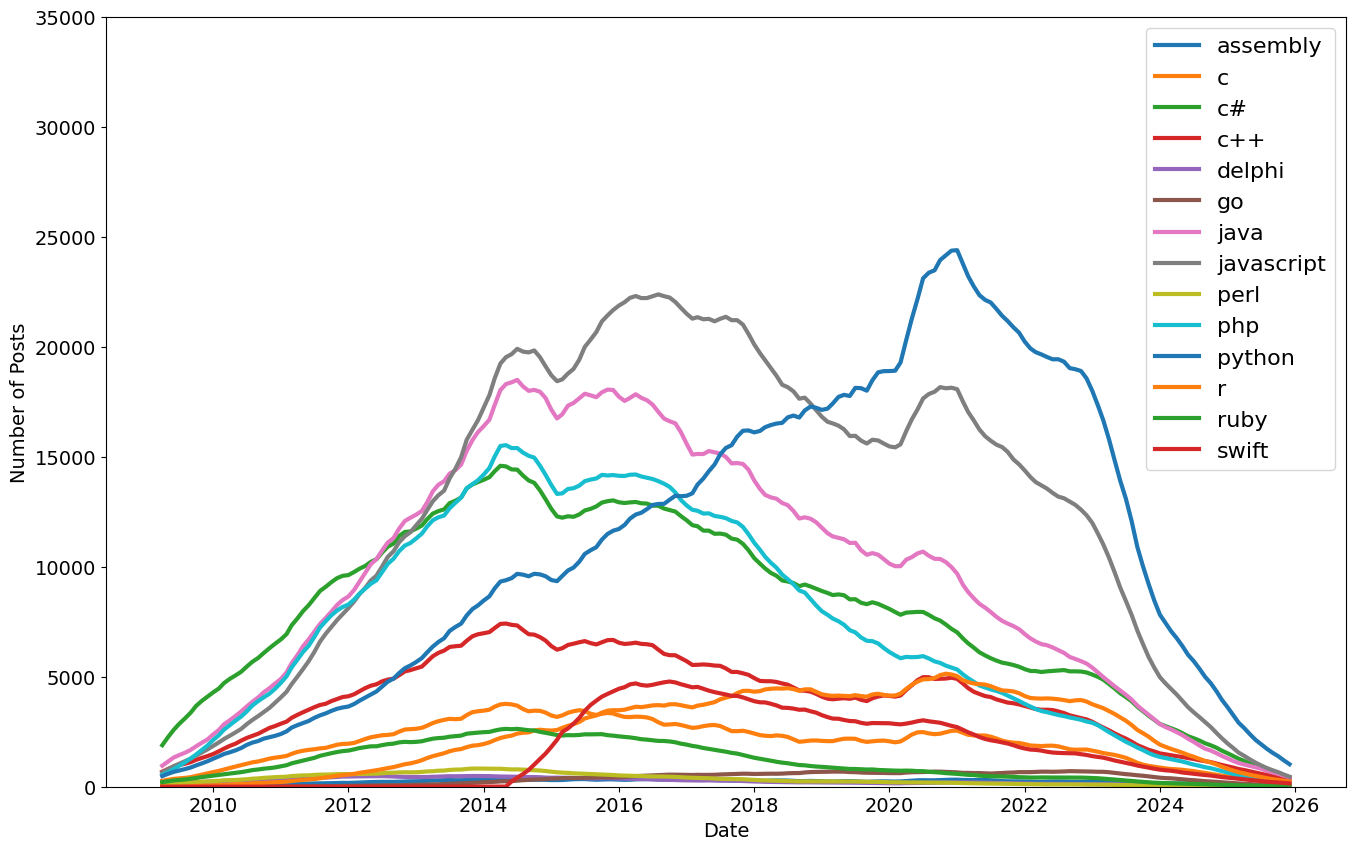

In [52]:
roll_df = reshaped_df.rolling(window=10).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)